<span style='background:#DCEDC8; font-size:30px; display:block; border-left:40px solid #C5E1A5; padding-left:40px;'>
<b>
    Download multiple meteoscreening variables
</b>
</span>

**notebook version**: `1.1` (26 Apr 2023)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Specify what you want to download in the `User settings`
- Data are stored to a `.csv` file in this folder

# **User settings** (please adjust)

## Site

In [1]:
SITE='ch-oe2'

## Variables to download
- Specify variables as shown in the database

In [2]:
# Variable names
# Variables are called FIELDS in the database; InfluxDB stores variable names as '_field'
FIELDS = ['SW_IN_M1_1_1']  

# Measurement names
# used to group similar variable together, e.g., 'TA' contains all air temperature variables
MEASUREMENTS = ['SW']

## Time range to download
- `START`: Download data starting with this date (the start date itself IS included)
- `STOP`: Download data before this date (the stop date itself IS NOT included)

In [3]:
START = '2021-01-01 00:00:01'  
STOP = '2022-01-01 00:00:01'

## Output file
- Name of the output file that will contain the downloaded data

In [4]:
OUTFILE = f"CH-OE2_SW_IN_2021.csv"

# **Auto-settings**

## Data settings

In [5]:
DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
DATA_VERSION = 'meteoscreening'
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30T'  # 30MIN time resolution

## Imports

In [6]:
from datetime import datetime
import pkg_resources
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_theme('notebook')

from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.times.times import DetectFrequency

C:\Users\holukas\AppData\Local\Temp\ipykernel_14192\2644345916.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Loading BokehJS ...

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"This page was last modified on: {dt_string}")
version_diive = pkg_resources.get_distribution("diive").version
print(f"diive version: v{version_diive}")
version_dbc_influxdb = pkg_resources.get_distribution("dbc_influxdb").version
print(f"dbc-influxdb version: v{version_dbc_influxdb}")

This page was last modified on: 2023-10-05 13:55:08
diive version: v0.63.0
dbc-influxdb version: v0.10.0


## Connect to database

In [8]:
dbc = dbcInflux(dirconf=DIRCONF)

Reading configuration files was successful.
Connection to database works.


# **Download**

In [9]:
%%time
data_simple, data_detailed, assigned_measurements = dbc.download(bucket=f'{SITE}_processing',
                                                                 measurements=MEASUREMENTS,
                                                                 fields=FIELDS,
                                                                 start=START,
                                                                 stop=STOP,
                                                                 timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
                                                                 data_version=DATA_VERSION)

    variables ['SW_IN_M1_1_1'] from measurements ['SW']
    between 2021-01-01 00:00:01 and 2022-01-01 00:00:01
    in data version meteoscreening
    with timezone offset to UTC of 1
Downloaded data for 1 variables:
    SW_IN_M1_1_1   (17518 records)     first date: 2021-01-01 00:30:00    last date: 2022-01-01 00:00:00
Fields in measurement SW of bucket ch-oe2_processing:
#1  ch-oe2_processing  SW  NIGHT
#2  ch-oe2_processing  SW  SW_IN_ERA
#3  ch-oe2_processing  SW  SW_IN_F
#4  ch-oe2_processing  SW  SW_IN_F_MDS
#5  ch-oe2_processing  SW  SW_IN_F_MDS_QC
#6  ch-oe2_processing  SW  SW_IN_F_QC
#7  ch-oe2_processing  SW  SW_IN_M1_1_1
#8  ch-oe2_processing  SW  SW_IN_M1_1_2
#9  ch-oe2_processing  SW  SW_IN_POT
Found 9 fields in measurement SW of bucket ch-oe2_processing.
CPU times: total: 1.41 s
Wall time: 1.57 s


In [10]:
data_simple

,SW_IN_M1_1_1
TIMESTAMP_END,
2021-01-01 00:30:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 01:30:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 02:30:00,0.0
...,...
2021-12-31 22:00:00,0.0
2021-12-31 22:30:00,0.0
2021-12-31 23:00:00,0.0


### Check time resolution of downloaded data

<span style='background:#FFF8E1; font-size:14px;'>
    new in notebook v1.1
</span>

In [11]:
_checkfreq = DetectFrequency(index=data_simple.index, verbose=True).get()
if _checkfreq == '30T':
    print(f">>> TEST PASSED - The downloaded dataset has a time resolution of {_checkfreq}. <<<")
else:
    print(f"{'#' * 20}(!)TEST FAILED - The downloaded dataset does not have the expected time resolution of {_checkfreq}.{'#' * 20}")

Detecting time resolution from timestamp TIMESTAMP_END ... OK (detected 30T time resolution 30T with MEDIUM confidence)
OK
   Detected 30T time resolution with MEDIUM confidence.
   Records at start and end of file have consistent timestamp:
       from full data = None / -failed- (not used)
       from timedelta = 30T / >90% occurrence (not used)
       from progressive = 30T / data 1000+1000 (OK)

>>> TEST PASSED - The downloaded dataset has a time resolution of 30T. <<<


## Time series plot

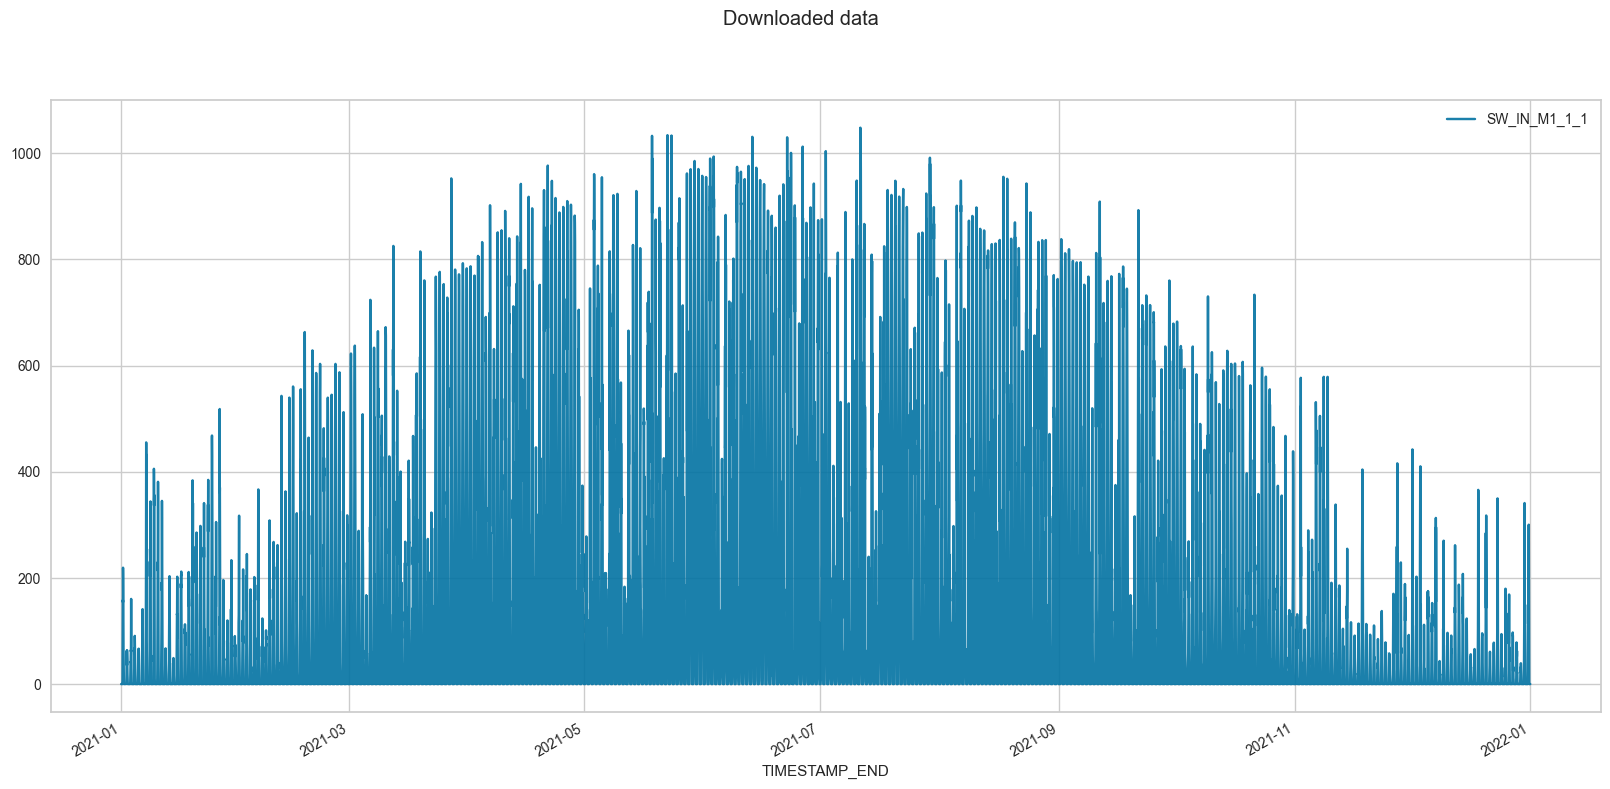

In [14]:
data_simple.plot(subplots=True, figsize=(20, 9), title="Downloaded data", alpha=.9);

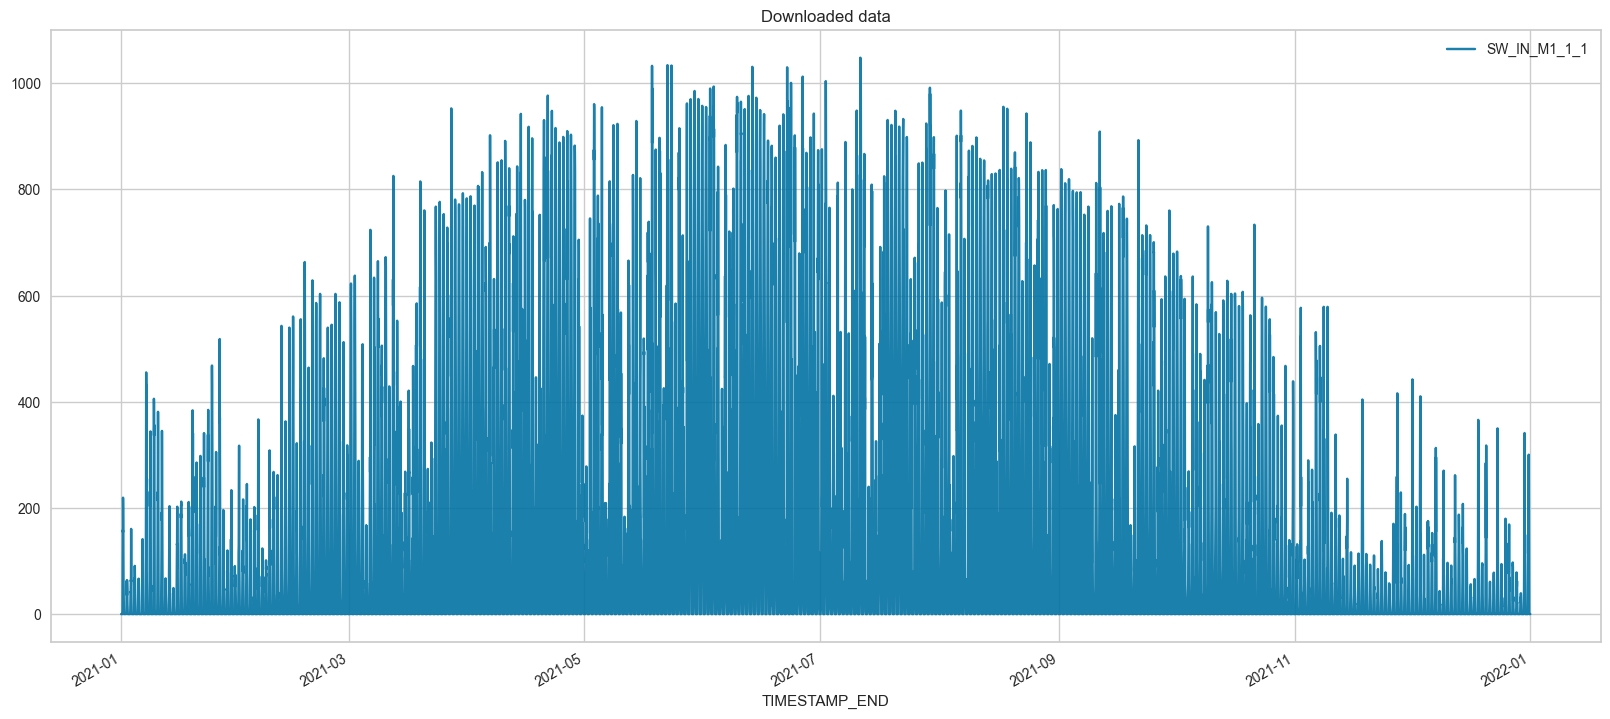

In [15]:
data_simple.plot(subplots=False, figsize=(20, 9), title="Downloaded data", alpha=.9);

## Heatmap

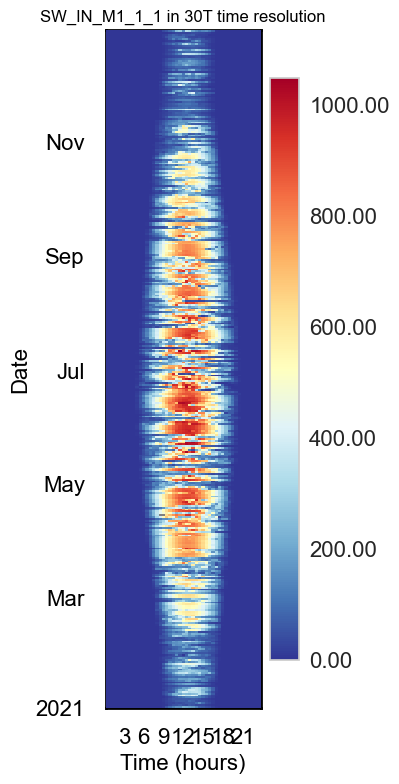

In [16]:
for col in data_simple.columns:    
    series = data_simple[col].asfreq('30T')
    HeatmapDateTime(series, figsize=(4,8)).show()    

## Stats

In [17]:
data_simple.describe()

,SW_IN_M1_1_1
count,17518.000000
mean,146.055129
std,238.516252
min,0.000000
25%,0.000000
50%,2.983408
75%,196.370146
max,1048.238438


## Save to file

In [18]:
data_simple.to_csv(OUTFILE)

In [19]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2023-10-05 13:55:58
